In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#getting the weights,configrations & coco.names for YOLOv3  from('https://pjreddie.com/darknet/yolo/')
net = cv2.dnn.readNet('yolov3.weights' , 'yolov3.cfg')

with open('coco.names' , 'r') as f:
    classes = f.read().splitlines()
    
img = cv2.imread('img.jpg')
height , width , _ = img.shape

# getting the blob out from the image ( that do many steps in one : scaling , resize , swaping red & blue , 
# also can crop the image as needed
blob = cv2.dnn.blobFromImage(img , 1/255,(416,416), swapRB=True,crop=False)

# making the model ready 
net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()
output_layers = net.forward(output_layers_names)

boxes =[]
confidents=[]
class_ids=[]

for output in output_layers:       # for each type of detection ' output'
    for detection in output:       # for each elements in one type
        score=detection[5:]
        class_id = np.argmax(score) #getting location of max probability ratio for detection item for each
        confident =score[class_id] # getting the max probability 
        
        if confident > 0.5 :
            # taking the location of detect for each single detection
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width ) 
            h = int(detection[3] * height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            # saving the details for each detection 
            boxes.append([x,y,w,h])
            confidents.append(float (confident))
            class_ids.append(class_id)
            
indexes = cv2.dnn.NMSBoxes(boxes ,confidents , 0.5 , 0.4) 
# to prevent detecting same element more than one time


font = cv2.FONT_HERSHEY_PLAIN # setting the font to be used
colors = np.random.uniform(0,255,size =(len(boxes),3)) # getting the colors valur randomly 

for i in indexes.flatten(): # explained under the main code block
    x,y,w,h = boxes[i]
    color = colors[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidents[i] , 2)) # to used in (putText ) it should becom string 
    
    cv2.rectangle(img , (x,y), (x+w , y+h) , color , 2) # drawing the rectangle for each detected element
    cv2.putText(img , label + ' ' + confidence , (x , y+20 ) , font , 2, color , 2)
    
    print(label + '     '+ confidence) # printing the detection details
    
cv2.imshow('image' , img)
cv2.waitKey(0)
cv2.destroyAllWindows()
    
        
        
        
        
# the detections and percentage of confidence         

person     1.0
person     1.0
person     0.99
person     0.98
cup     0.98
laptop     0.98
laptop     0.97
person     0.95
chair     0.93
chair     0.62


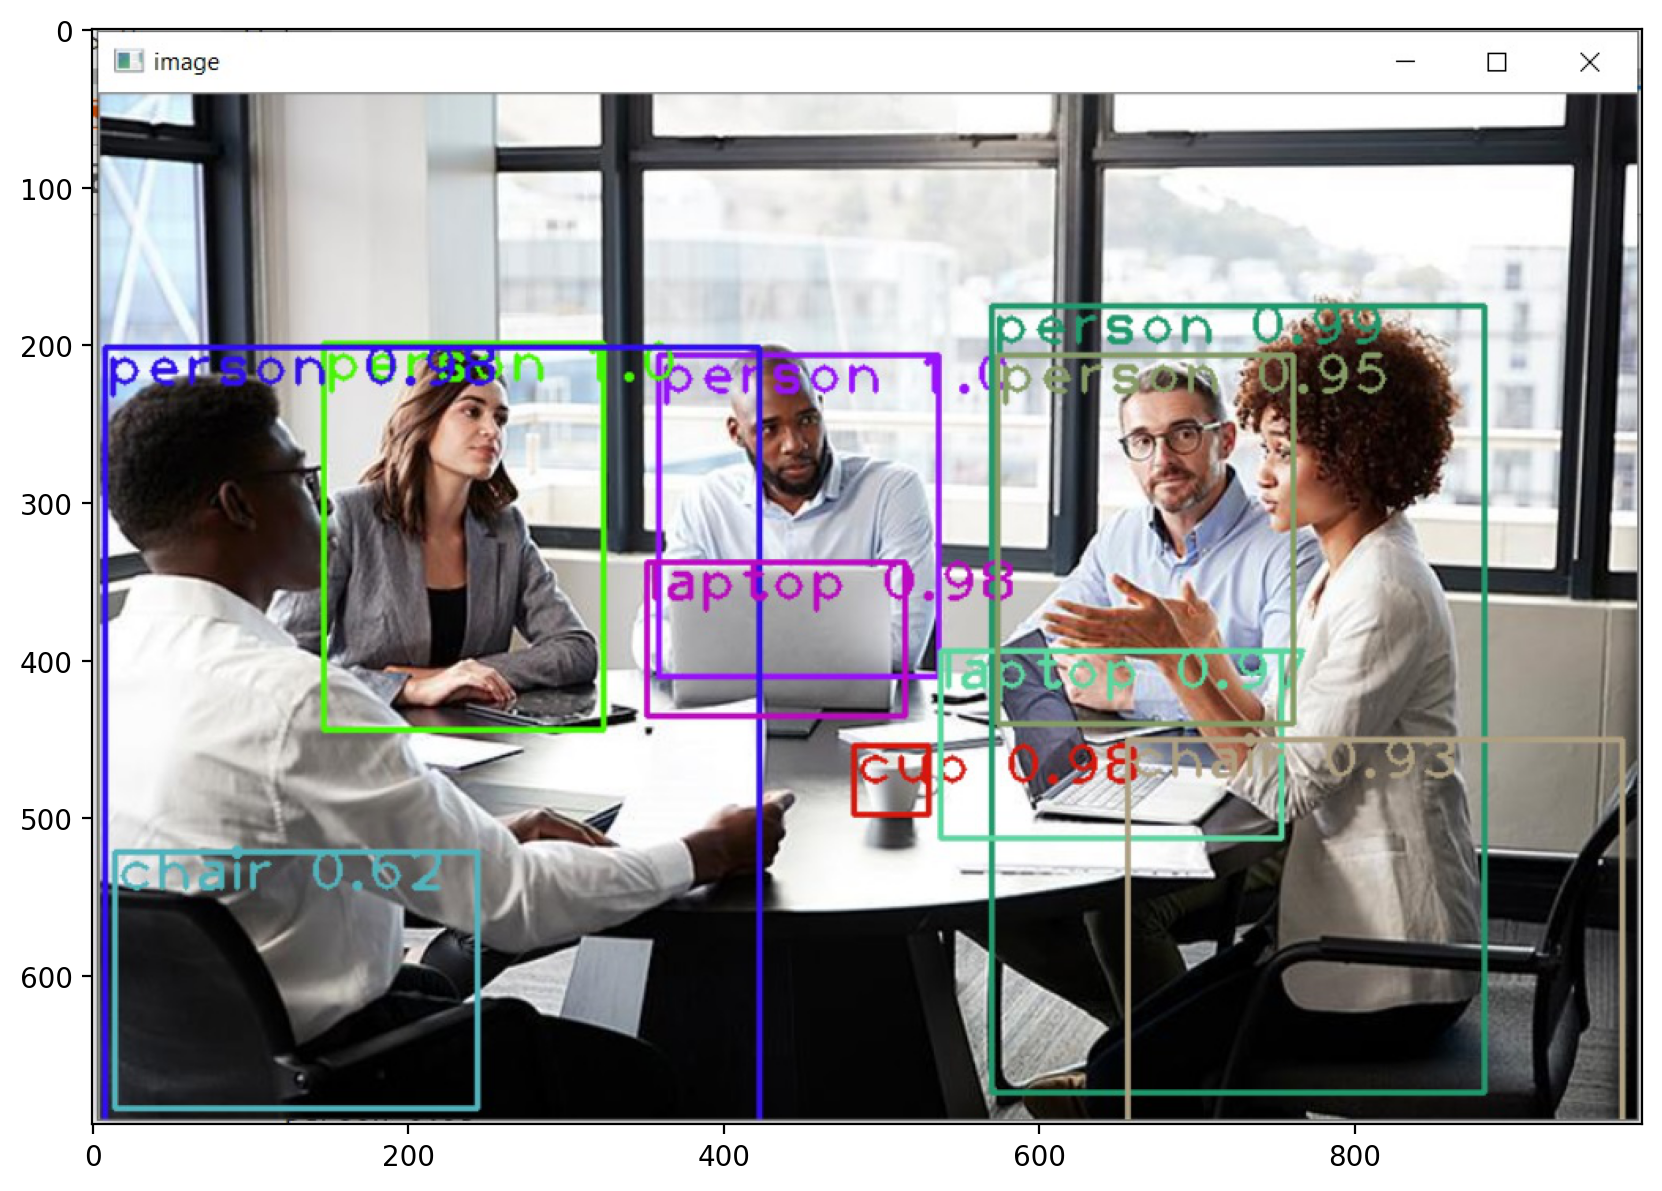

In [3]:
# the output from the code
result = cv2.cvtColor( cv2.imread('yolov3 result.jpg') , cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8), dpi =200)
plt.imshow(result);

In [4]:
# .flatten() function : used to get a copy of an given array collapsed into one dimension
indexes

array([[ 6],
       [ 7],
       [ 1],
       [ 2],
       [11],
       [ 9],
       [ 3],
       [ 8],
       [ 4],
       [ 5]], dtype=int32)

In [5]:
for i in indexes:
    print(i)

[6]
[7]
[1]
[2]
[11]
[9]
[3]
[8]
[4]
[5]


In [6]:
for i in indexes.flatten():
    print(i)

6
7
1
2
11
9
3
8
4
5
